# Atari: Space Invador 👾 ~ Deep Q Learning

**Author:** Santiago Bobadilla Suarez

**Last Modify:** 12/05/2021

The following booklet is not an own implementation but an adaptation and compilation of all the bibliography presented below. Its purpose is purely educational, and for no lucrative reason.

---

**Bibliografy:**

*   [DQN - Playing Atari with Deep Reinforcement Learning | RL Paper Explained](https://www.youtube.com/watch?v=H1NRNGiS8YU)
*   [Automating Pac-man with Deep Q-learning: An Implementation in Tensorflow.](https://towardsdatascience.com/automating-pac-man-with-deep-q-learning-an-implementation-in-tensorflow-ca08e9891d9c)
*   [Optimized Space Invaders using Deep Q-learning: An Implementation in Tensorflow 2.0.](https://towardsdatascience.com/optimized-deep-q-learning-for-automated-atari-space-invaders-an-implementation-in-tensorflow-2-0-80352c744fdc)
*   [Deep Q Learning with Atari© Space Invaders©](https://github.com/simoninithomas/Deep_reinforcement_learning_Course/blob/master/Deep%20Q%20Learning/Space%20Invaders/DQN%20Atari%20Space%20Invaders.ipynb)
*   [Deep Q Learning with Tensorflow and Space Invaders (tutorial)](https://www.youtube.com/watch?v=gCJyVX98KJ4&t=59s)
*   [Deep Reinforcement Learning for Atari Games Python Tutorial | AI Plays Space Invaders](https://www.youtube.com/watch?v=hCeJeq8U0lo&t=1905s)

---

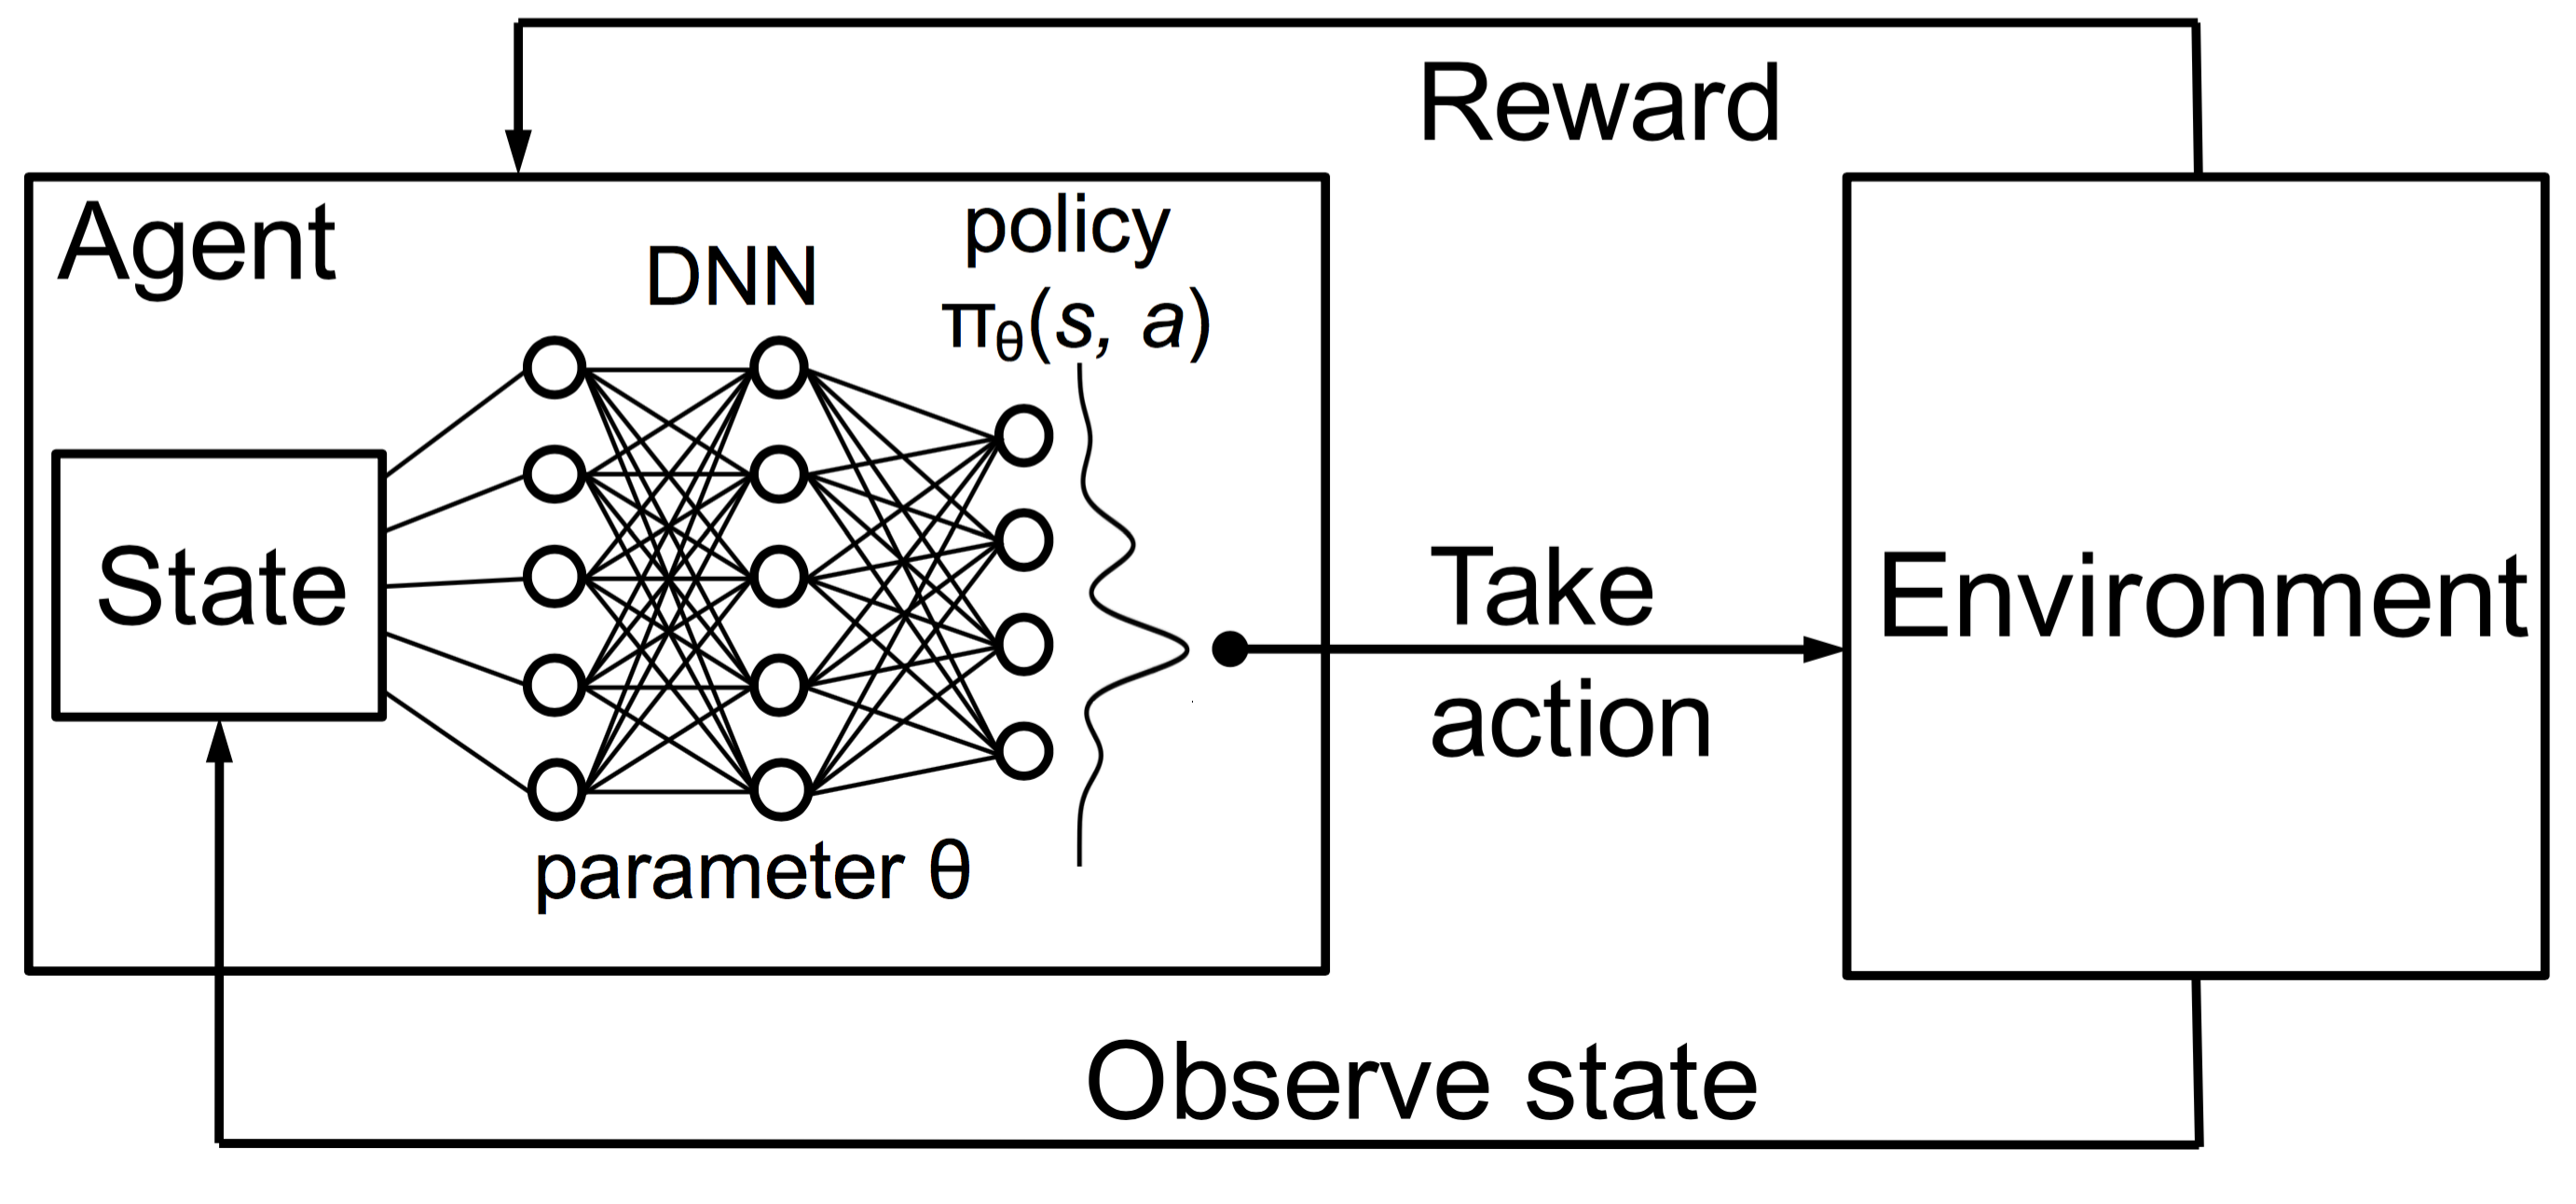

---

**Implementation**

1. *`We define our Deep Q-learning neural network.`* This is a CNN that takes in-game screen images and outputs the probabilities of each of the actions, or Q-values, in the Atari gamespace. To acquire a tensor of probabilitieses, we do not include any activation function in our final layer.

2. As Q-learning require us to have knowledge of both the current and next states, we need to *`start with data generation`*. We feed preprocessed input images of the game space, representing initial states s, into the network, and acquire the initial probability distribution of actions, or Q-values. Before training, these values will appear random and sub-optimal.

  2.1. *`Frame stacking`*: the joining of several game frames together to provide a temporal reference of our game environment. 

  2.2.*` Frame composition`*: the element-wise maximization of two game frames together to provide a motion reference that also overcomes the issue of partial rendering.

3. With our tensor of probabilities, we then *`select the action`* with the current highest probability using the argmax() function, and use it to build an epsilon greedy policy.

4. *`Using our policy, we’ll then select the action a, and evaluate our decision`* in the gym environment to receive information on the new state s’, the reward r, and whether the episode has been finished.

5. *`We store this combination of information in a buffer`* in the list form <s,a,r,s’,d>, and repeat steps 2–4 for a preset number of times to build up a large enough buffer dataset.

6. Once step 5 has finished, we move to *`generate our target y-values, R’ and A’`*, that are required for the loss calculation. While the former is simply discounted from R, we obtain the A’ by feeding S’ into our network.

7. With all of our components in place, we can then *`calculate the loss to train our network.`*

8. Once training has finished, we’ll *`evaluate the performance`* of our agent graphically and through a demonstration.

# Necessary Packages

*   Today, there are easier ways to build networks with TensorFlow; however, version 1.15 is used to implement a flexible and analysable architecture, more than a black box.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
!pip uninstall tensorflow
!pip install tensorflow==1.15

In [ ]:
import tensorflow as tf
print(tf.__version__)

*   In case you are testing it in Colab, space where it was implemented, in order to see the results you need the following packages to generate the display.

In [ ]:
!pip install gym pyvirtualdisplay 
!apt-get install -y xvfb python-opengl ffmpeg 

!apt-get update 
!apt-get install cmake 
!pip install --upgrade setuptools 
!pip install ez_setup 

# Libraries

**Environment**

*   Gym is a toolkit for developing and comparing Reinforcement Learning algorithms. It is implemented in Python and R (though the former is primarily used) and can be used to make your code for training RL models short, simple, and easy-to-read.
*   To have log of the Gym actions. More information in [GitHub](https://github.com/openai/gym/blob/master/gym/logger.py) 
*   Gym monitor creates json files in the recording directory.

**AI**

*   TensorFlow is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.
*   Layer we are going to use in our neural network.

**Architecture**


*   Collections in Python are containers that are used to store collections of data, for example, list, dict, set, tuple etc. We will use deque and counter.
*   NumPy is a Python library used for working with arrays.
*   Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.
*   When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.
*   Random implements pseudo-random number generators for various distributions.
*   The datetime module supplies classes for manipulating dates and times.

**Extra**


*   The math module is used to access mathematical functions in the Python
*   The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell, although results are returned in arbitrary order. 
*   The io module provides Python’s main facilities for dealing with various types of I/O. 
*   The Base64 encoding is used to convert bytes that have binary or text data into ASCII characters.
*   Public API for display tools in IPython.

In [ ]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) 

import tensorflow as tf
from tensorflow.contrib.layers import flatten, conv2d, fully_connected

from collections import deque, Counter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
from datetime import datetime

import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display

import warnings
warnings.filterwarnings('ignore')

# Environment

The [Gym environment](https://gym.openai.com/envs/#atari) has not only Atari games, as is this implementation, but many other tools. In our case, it is important to review for the game that we are implementing what its features are.

In [ ]:
env = gym.make("SpaceInvaders-v0")                                               # ... Make the game we want to test.

num_actions = env.action_space.n                                                 # ... Obtain the number of possible actions.
action_meaning = env.get_action_meanings()                                       # ... Obtain the meaning of each posiible action.
dimensions_frame = env.reset().shape                                             # ... Obtain the frame dimensions of the game.

print(f"There are a total of {num_actions} possible actions.")
print(f"The posiible actions are: {action_meaning}")
print(f"The frame has the next dimensions: {dimensions_frame}")

observation = env.reset()                                                        # ... Reset the game, advance in the game and show a frame to obtain the complete idea. 

for i in range(9):
  if i > 7:
    plt.imshow(observation)
    plt.show()
  observation, _, _, _ = env.step(1)

It does not necessarily have to be Space-Invader, Gym has many more games, but, in case of change: Watch out for that which affects and is not parameterized. The complete list of environments is [here](https://github.com/openai/gym/wiki/Table-of-environments).

# Functions

**Preprocess Observation**

Next, we define a preprocessing function to crop the images from our gym environment and convert them into one-dimensional tensors. we want to reduce the complexity of our states to reduce the computation time needed for training.

1. Take a frame.
2. Grayscale it
3. Resize it.

        __________________
        |                 |
        |                 |
        |                 |
        |                 |
        |_________________|
        
        to
        _____________
        |            |
        |            |
        |            |
        |____________|
    
4. Normalize it.

In [ ]:
def preprocess_observation(obs):                                                 # ... Enter a complete frame (Rember that for the compute a frame are arrays of data).

    img = obs[25:201:2, ::2]                                                     # ... Crop the useless part of the frame.
    img = img.mean(axis=2)                                                       # ... Convert the frame to greyscale.
    img[img==np.array([210, 164, 74]).mean()] = 0                                # ... Improve image contrast.
    img = (img - 128) / 128 - 1                                                  # ... Normalize the image from -1 to +1.

    return img.reshape(88,80)                                                    # ... Return the resize image.

Let’s check how serious the processed frames are. Here it is of the utmost importance to define the size of the resize and how much of the original image can be removed.

In [ ]:
obs_preprocessed = preprocess_observation(observation).reshape(88,80)            # ... Using the frame form "Environment" we now process it.

print(f"The original dimensions of the frame were {observation.shape}")
print(f"The process frame now has the dimensions of {obs_preprocessed.shape}")

plt.imshow(obs_preprocessed)                                                     # ... Plot the process frame, and show it to observe how it changes.
plt.show()

**Stacking and Composition**

---

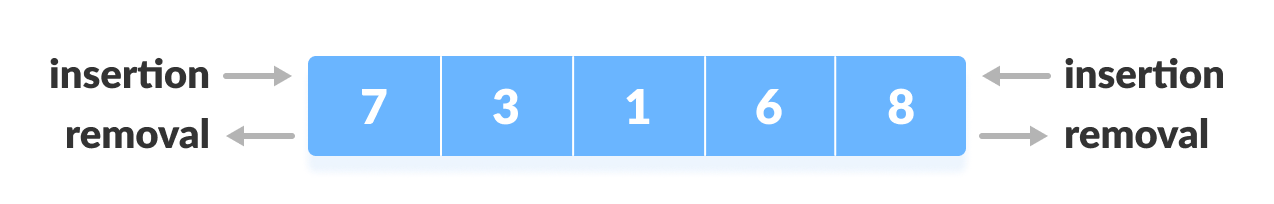

---

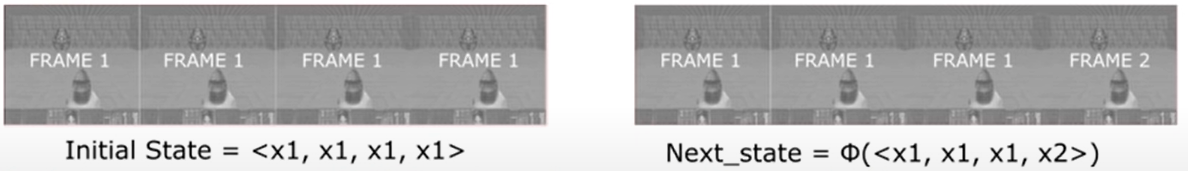

---


* Stacking frames is really important because it helps us to give have a sense of motion to our Neural Network.
* The idea is that the action agents choose depends on the prior sequence of game frames.
* BUT we don't stack each frames, we skip 4 frames at each timestep. This means that only every fourth frame is considered. And then, we use this frame to form the stack_frame.

*`General Description`*

Upon a new episode, we start off by taking two of our input frames and returning an element-wise maximum summation maxframe of the two (note that technically this is not necessary, as the two frames are the same, but serves for good practice). The stacked frames are stored in a deque, which automatically removes older entries as new entries are introduced. Initially, we copy the preprocessed maxframe to fill out our deque. 

As the episode progresses, we create new maxframes by taking the new frame, element-wise maximum summing it with the most recent entry in our deque, and then appending the new maxframe to our deque. We then stack the frames at the very end of the process.

*`Process`*

1. Preprocess frame.
2. Append the frame to the deque that automatically removes the oldest frame.
3. Build the stacked state.

*`Warning`*

Paper used a sequence of four game frames stacked together, making the data dimension (4,88,80). 

Due to the way that Atari renders screens, every other frame may not actually be rendered. This is negatively affecting our performance, so instead, we take Deepmind's approach of element wise maxima. Create stack of 4, with 2 images combined via elementwise -maxima-


In [ ]:
def stack_frames(stacked_frames, state, is_new_episode):
    
    frame = preprocess_observation(state)                                                                     # ... Preprocess frame.

    if is_new_episode:                                                                                        # ... Beacuse we are in a new episode.
        
        stacked_frames = deque([np.zeros((88,80), dtype=np.int) for i in range(stack_size)], maxlen=4)        # ... Clear our stacked_frames.
        maxframe = np.maximum(frame,frame)                                                                    # ... Apply elementwise maxima.

        # ... Copy the same frame 4x
        stacked_frames.append(maxframe)
        stacked_frames.append(maxframe)
        stacked_frames.append(maxframe)
        stacked_frames.append(maxframe)

        stacked_state = np.stack(stacked_frames, axis=2)                                                      # ... Stack the frames.
        
    else:
        maxframe = np.maximum(stacked_frames[-1],frame)                                                       # ... Apply elementwise maxima.
       
        stacked_frames.append(maxframe)                                                                       # ... Append frame to deque, automatically removes the oldest frame.
        stacked_state = np.stack(stacked_frames, axis=2)                                                      # ... Stack the frames.
    
    return stacked_state, stacked_frames

**Q~Network**

Let’s define our model, a deep Q-network. This is essentially a three-layer convolutional network that takes preprocessed input images, flattens and feeds them to a fully-connected layer, and outputs the probabilities of taking each action in the game space. As previously mentioned, there’s no activation layer here, as the presence of one would result in a binary output distribution.

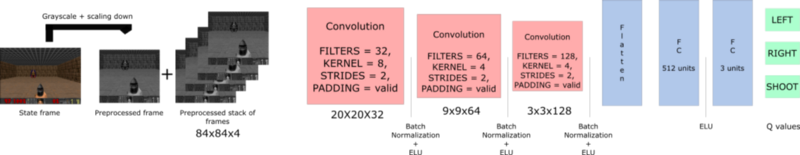


In [ ]:
# ... Clears the default graph stack and resets the global default graph.
tf.compat.v1.reset_default_graph()

def q_network(X, name_scope):
    
    # ... Initialize layers
    initializer = tf.compat.v1.keras.initializers.VarianceScaling(scale=2.0)

    # ... A context manager for defining ops that creates variables (layers).
    # ... Variable scope allows you to create new variables and to share already created ones while providing checks to not create or share by accident.
    with tf.compat.v1.variable_scope(name_scope) as scope: 

        # ..... Initialize Convolutional Layers ~ A convolution is the simple application of a filter to an input that results in an activation.

        # ... Layer 1
        layer_1 = conv2d(X, num_outputs=32, kernel_size=(8,8), stride=4, padding='SAME', weights_initializer=initializer) 
        tf.compat.v1.summary.histogram('layer_1',layer_1)
        
        # ... Layer 2
        layer_2 = conv2d(layer_1, num_outputs=64, kernel_size=(4,4), stride=2, padding='SAME', weights_initializer=initializer)
        tf.compat.v1.summary.histogram('layer_2',layer_2)
        
        # ... Layer 3
        layer_3 = conv2d(layer_2, num_outputs=64, kernel_size=(3,3), stride=1, padding='SAME', weights_initializer=initializer)
        tf.compat.v1.summary.histogram('layer_3',layer_3)
        
        # ... Flatten Layer ~ A flatten layer collapses the spatial dimensions of the input into the channel dimension.
        flat = flatten(layer_3)

        # ... Fully Connected Layer ~ Fully Connected layers in a neural networks are those layers where all the inputs from one layer are 
                                    # connected to every activation unit of the next layer. In most popular machine learning models, the last 
                                    # few layers are full connected layers which compiles the data extracted by previous layers to form the final output.

        fc = fully_connected(flat, num_outputs=128, weights_initializer=initializer)
        tf.compat.v1.summary.histogram('fc',fc)

        #... Output layer
        output = fully_connected(fc, num_outputs=n_actions, activation_fn=None, weights_initializer=initializer)
        tf.compat.v1.summary.histogram('output',output)
        
        # ... Vars will store the parameters of the network such as weights
        vars = {v.name[len(scope.name):]: v for v in tf.compat.v1.get_collection(key=tf.compat.v1.GraphKeys.TRAINABLE_VARIABLES, scope=scope.name)} 

        # ... Return both variables and outputs together
        return vars, output

**Exploration - Exploitation Paradigm**

Recall, that Q-learning requires us to select actions with the highest action values. To ensure that we still visit every single possible state-action combination, we’ll have our agent follow an epsilon-greedy policy. We’ll set this exploration rate to decay with time, as we eventually assume all combinations have already been explored.

In [ ]:
def epsilon_greedy(action, step):

    p = np.random.random(1).squeeze()                                            # ... Random probability.

    if p < epsilon:
        return np.random.randint(n_actions)                                      # ... Select exploration.
    else:
        return action                                                            # ... Select Explotation.

**Sample Memories**

The function is sampling experiences from the memory according to batches. The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.

Think of a batch as a for-loop iterating over one or more samples and making predictions. At the end of the batch, the predictions are compared to the expected output variables and an error is calculated. From this error, the update algorithm is used to improve the model. 



*   *`Batch Gradient Descent:`* Batch Size = Size of Training Set
*   *`Stochastic Gradient Descent: `*Batch Size = 1
*   *`Mini-Batch Gradient Descent:`* 1 < Batch Size < Size of Training Set

For this case, batch size is the number of experiences sampled from the memory.The update function for Q-learning requires the following:

1. The current state `s`
2. The current action `a`
3. The reward following the current action `r`
4. The next state `s’`
5. The next action `a’`

To supply these parameters in meaningful quantities, we need to evaluate our current policy following a set of parameters and store all of the variables in a buffer, from which we’ll draw data in minibatches during training.

In [ ]:
def sample_memories(batch_size):

    _batch = np.random.permutation(len(exp_buffer))[:batch_size]                 # ... Let up to the buffer size, and select a random batch.
    mem = np.array(exp_buffer)[_batch]                                           # ... Redifine the random selection yo an array.

    return mem[:,0], mem[:,1], mem[:,2], mem[:,3], mem[:,4]                      # ... Return each postion of this random memory learning as <s,a,r,s'>.

**Show Video**

Utility functions to enable video recording of gym environment and displaying it.

In [ ]:
def show_video():

  mp4list = glob.glob('video/*.mp4')

  if len(mp4list) > 0:

    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)

    ipythondisplay.display(HTML(data = '''<video alt="test" autoplay loop controls style="height: 400px;">
                                          <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                                          </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")

**Wrap Env**

Enable video

In [ ]:
def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

# Hyperparameters for our Model and Training Process

In this part we'll set up our different hyperparameters. But when you implement a Neural Network you will not implement hyperparamaters at once but progressively.

1. You begin by defining the neural networks hyperparameters when you implement the model.
2. Then, you'll add the training hyperparameters when you implement the training algorithm.

In [ ]:
# ... Q ~ Learning

num_episodes = 800                                                                                                # ... Number of episodes.
learning_rate = 0.05                                                                                              # ... Alpha.
discount_factor = 0.93                                                                                            # ... Gamma.

epsilon = 0.75                                                                                                    # ... Between 0 to 1. Chance to explore. 
START_EPSILON_DECAY = 1                                                                                           # ... Episode where the epsilon will start to have effect.
END_EPSILON_DECAY = num_episodes // 1.5                                                                           # ... Episode where the epsilon will stop having effect.
epsilon_decay_value = epsilon / (END_EPSILON_DECAY - START_EPSILON_DECAY)                                         # ... Rate of decay of the epsilon after each step.

# ... Netwok

stack_size = 4                                                                                                    # ... We stack 4 frames.
stacked_frames = deque([np.zeros((88,80), dtype=np.int) for i in range(stack_size)], maxlen = stack_size)         # ... Define the deque.

batch_size = 48                                                                                                   # ... Size of the batch.
buffer_len = 20000                                                                                                # ... Total size of the buffer.
exp_buffer = deque(maxlen = buffer_len)                                                                           # ... Deque to save experience.

# ... Model

n_actions = env.action_space.n                                                                                    # ... Number of possible actions.
input_shape = (None, 88, 80, 1)                                                                                   # ...
X_shape = (None, 88, 80, stack_size)                                                                              # ... Final shape of the analys object.

# ... Run

logdir = 'logs'                                                                                                   # ... Helpfull to register changes and things that happens.
global_step = 0                                                                                                   # ... Count of all the steps .
steps_train = stack_size                                                                                          # ... Iteration value to train.
copy_steps = num_episodes // 5                                                                                    # ... Back a backup of the steps.
start_steps = num_episodes // 2                                                                                   # ... Register steps.

# Initialization

**Placeholder**

A placeholder is simply a variable that we will assign data to at a later date. It allows us to create our operations and build our computation graph, without needing the data. In TensorFlow terminology, we then feed data into the graph through these placeholders.

In [ ]:
tf.compat.v1.reset_default_graph()                                               # ... Clears the default graph stack and resets the global default graph.
_ph = tf.compat.v1.placeholder(tf.float32, shape = X_shape)                      # ... Placeholder for our input game state.
in_training_mode = tf.compat.v1.placeholder(tf.bool)                             # ... Boolean to toggle the training.

**Primal and Target Q network**

We have two networks to allow for training and data generation to occur concurrently. Note that the network returns the weights, as well as network outputs.


In [ ]:
main_Q, main_Q_outputs = q_network(_ph, 'main_Q')                                 # ... Build our Q network, which takes the input X and generates Q values for all the actions in the state.
target_Q, target_Q_outputs = q_network(_ph, 'target_Q')                           # ... Build our target Q network.

_action = tf.compat.v1.placeholder(tf.int32, shape=(None,))                                                         # ... Placeholder for our action values.
Q_action = tf.reduce_sum(input_tensor = target_Q_outputs * tf.one_hot(_action, n_actions), axis=-1, keepdims=True)  # ... Computes the sum of elements across dimensions of a tensor.


**Copies**

Copy the primary Q network parameters to the target Q network

In [ ]:
copy_op = [tf.compat.v1.assign(main_name, target_Q[var_name]) for var_name, main_name in main_Q.items()]    # ... Make a copy of the primal Q network
copy_target_to_main = tf.group(*copy_op)                                                                    # ... Create an op that groups multiple operations.

**Gradient Descent Optimizer**

Define our loss. This is simply the squared difference of our target action (with the highest action value) and our predicted action. We’ll use an ADAM optimizer to minimize our loss during training.

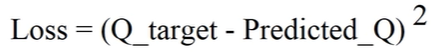

In [ ]:
y = tf.compat.v1.placeholder(tf.float32, shape=(None,1))                                      # ... Placeholder for our output action.

loss = tf.reduce_mean(input_tensor=tf.square(y - Q_action))                                   # ... Calculate the loss.
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate)                                   # ... Adam Optimizer for minimizing the loss.
training_op = optimizer.minimize(loss)                                                        # ... Optimize.

**Information**

Register all the model, and save it in a file. After this point the Network should not have changes.

In [ ]:
init = tf.compat.v1.global_variables_initializer()                                            # ... Initialice all variables of the network.
loss_summary = tf.compat.v1.summary.scalar('LOSS', loss)                                      # ... Script the loss.
merge_summary = tf.compat.v1.summary.merge_all()                                              # ... Script all the characteristics of the Network.
file_writer = tf.compat.v1.summary.FileWriter(logdir, tf.compat.v1.get_default_graph())       # ... Save all !!

# Main

**Recall General Process**

1. For each epoch, we feed an input image stack into our network to generate a probability distribution of the available actions, before using an epsilon-greedy policy to select the next action.
2. Input this into the network, and obtain information on the next state and accompanying rewards, and store this into our buffer. We update our stack and repeat this process over a number of pre-defined steps.
3. After our buffer is large enough, we feed the next states into our network to obtain the next action. We also calculate the next reward by discounting the current one.
4. We generate our target y-values through the Q-learning update function and train our network.
5. By minimizing the training loss, we update the network weight parameters to output improved state-action values for the next policy.

**Run Model Detail Process**

1. Preprocess and feed the game screen (state s) to our DQN, which will return the Q values of all possible actions in the state.
2. Select an action using the epsilon-greedy policy: with the probability epsilon, we select a random action or we select an action that has a maximum Q value.
3. Perform this action in a state s and move to a new state s' and receive a reward. The next state, s', is the preprocessed image of the next game screen.
4. Store this transition in our replay buffer as <s,a,r,s'>.
5. Sample some random batches of transitions from the replay buffer and calculate the loss.
6. Perform gradient descent with respect to our actual network parameters to minimize this loss.
7. Copy weights of training network to actual network.
8. Repeat for M steps

In [ ]:
with tf.compat.v1.Session() as sess:                                              # ... With the actual Network we build throw all the Notebook
  
    init.run()                                                                    # ... Start all the variables of the Network
    history = []                                                                  # ... Will save the history of the reward to observe the progress

    for i in range(num_episodes):                                                 # ... Iterate throw all the episodes

        obs = env.reset()                                                         # ... For each episode we will start from zero
        done = False                                                              # ... For each episode we will till we the game ends
        
        epoch = 0                                                                 # ... Count the moves made in an episode.
        episodic_reward = 0                                                       # ... Acumulates the reward of the episode.
        episodic_loss = []                                                        # ... Register of the loss that the episode generates.
        
        obs, stacked_frames = stack_frames(stacked_frames,obs,True)               # ... As new episode we fill the stack.

        while not done:                                                           # ... While the game is not over.

            actions = main_Q_outputs.eval(feed_dict = {_ph:[obs], in_training_mode:False}) # ... Feed the network and get the Q values for each action.
            action = np.argmax(actions, axis=-1)                                            # ... Select the action that maximize.
            action = epsilon_greedy(action, global_step)                                    # ... Choose to explore or exploite the action.
            
            next_obs, reward, done, _ = env.step(action)                                    # ... Perform the action in the game. 
            next_obs, stacked_frames = stack_frames(stacked_frames, next_obs, False)        # ... Stack the new frame .
            exp_buffer.append([obs, action, next_obs, reward, done])                        # ... Store this transistion as an experience in the replay buffer!
            
            if global_step % steps_train == 0 and global_step > start_steps:                          # ... Train our Q network with samples from the experience replay buffer.

                o_obs, o_act, o_next_obs, o_rew, o_done = sample_memories(batch_size)                 # ... Recover information .
                o_obs = [x for x in o_obs]                                                            # ... States.
                o_next_obs = [x for x in o_next_obs]                                                  # ... Next States.
                next_act = main_Q_outputs.eval(feed_dict={_ph:o_next_obs, in_training_mode:False})    # ... Next Actions.
                y_batch = o_rew + discount_factor * np.max(next_act, axis=-1) * (1-o_done)            # ... Discounted Reward (Y-values).

                mrg_summary = merge_summary.eval(feed_dict={_ph:o_obs, y:np.expand_dims(y_batch, axis=-1), _action:o_act, in_training_mode:False})              # ... Summary all the data that we collect.
                file_writer.add_summary(mrg_summary, global_step)                                                                                               # ... Save the data to the file to persist it.

                train_loss, _ = sess.run([loss, training_op], feed_dict={_ph:o_obs, y:np.expand_dims(y_batch, axis=-1), _action:o_act, in_training_mode:True})  # ... Calculate Loss.
                episodic_loss.append(train_loss)                                                                                                                # ... Save the history of the loss's.
            
            if (global_step+1) % copy_steps == 0 and global_step > start_steps:                   # ... Copy our main Q network weights to target Q network
                copy_target_to_main.run()                                                         # ... Generates the copy

            obs = next_obs                                                        # ... Put the new frame as the actual frame.
            epoch += 1                                                            # ... Register that a move in the game was made.
            global_step += 1                                                      # ... Register to the count that a move was made.
            episodic_reward += reward                                             # ... Register the parcial rewards

        if END_EPSILON_DECAY >= i >= START_EPSILON_DECAY:                         # ... When that episode is done iterating, observe if the epsilon must be decay.
            epsilon -= epsilon_decay_value                                        # ... Decay the exploration probability.

        next_obs = np.zeros(obs.shape)                                            # ... Restar the observations.
        exp_buffer.append([obs, action, next_obs, reward, done])                  # ... Define that the experience of the new episode as new.
        history.append(episodic_reward)                                           # ... Archive the reward of the episode.

        print('Epochs per episode:', epoch, 'Episode Reward:', episodic_reward,"Episode number:", len(history))

**Plot the Reward Distribution**

In [ ]:
plt.plot(history)                     # ... Plot all the Rewards.
plt.show()                            # ... Show the plot made.

# Results

Run a new session of our environment using our model and record it.

In [ ]:
display = Display(visible=0, size=(1400, 900))
display.start()

In [ ]:
environment = wrap_env(gym.make('SpaceInvaders-v0'))                                                # ... Re define the environment in the Monitor to make a video.

done = False                                                                                        # ... Until the game is over.
observation = environment.reset()                                                                   # ... Start from zero.
new_observation = observation                                                                       # ... The new for now is the start frame.

with tf.compat.v1.Session() as sess:                                                                # ... With the Network of the Notebook.

    init.run()                                                                                      # ... Start all the variables of the Network.
    observation, stacked_frames = stack_frames(stacked_frames, observation, True)                   # ... As new episode we fill the stack.

    while True:                                                                                     # ... Util the game is over.

        actions = main_Q_outputs.eval(feed_dict={_ph:[observation], in_training_mode:False})           # ... Feed the network and get the Q values for each action.
        action = np.argmax(actions, axis=-1)                                                        # ... Select the action that maximize. Don't explore cause we already train.
        action = epsilon_greedy(action, global_step)                                                # ... Choose to explore or exploite the action.

        environment.render()                                                                        # ... Render before move to record all the moves.

        new_observation, stacked_frames = stack_frames(stacked_frames, new_observation, False)      # ... Stack the 'new' old frame.
        observation = new_observation                                                               # ... Update the old frame with the new.
        new_observation, reward, done, _ = environment.step(action)                                 # ... Make the action.
        
        if done:                                                                                    # ... If the game is over.
          break                                                                                     # ... Stop.
      
    environment.close()                                                                             # ... For secure close the environment.
    show_video()                                                                                    # ... Show the video.